## Exercises

>In the previous exercise section, we wrangled data from a PDF file containing vital statistics from Puerto Rico. We did this for the month of September. Below we include code that does it for all 12 months.

In [14]:
library(tidyverse)
library(purrr)
library(pdftools)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
fn <- system.file("extdata", "RD-Mortality-Report_2015-18-180531.pdf", package="dslabs")

In [3]:
tab <- map_df(str_split(pdf_text(fn), "\n"), function(s){
  s <- str_trim(s)
  header_index <- str_which(s, "2015")[1]
  tmp <- str_split(s[header_index], "\\s+", simplify = TRUE)
  month <- tmp[1]
  header <- tmp[-1]
  tail_index  <- str_which(s, "Total")
  n <- str_count(s, "\\d+")
  out <- c(1:header_index, which(n==1), which(n>=28), tail_index:length(s))
  s[-out] %>%
    str_remove_all("[^\\d\\s]") %>%
    str_trim() %>%
    str_split_fixed("\\s+", n = 6) %>%
    .[,1:5] %>%
    as_data_frame() %>% 
    setNames(c("day", header)) %>%
    mutate(month = month,day = as.numeric(day)) %>%
    gather(year, deaths, -c(day, month)) %>%
    mutate(deaths = as.numeric(deaths))
})

>1. We want to make a plot of death counts versus date. A first step is to convert the month variable from characters to numbers. Note that the month abbreviations are in Spanglish. Use the `recode` function to convert months to numbers and redefine `tab`.

In [4]:
tab <- tab %>% mutate(month = recode(month, 'JAN' = 01,'FEB' = 02,'MAR' = 03,'APR' = 04,'MAY' = 05,'JUN' = 06,'JUL' = 07,'AUG' = 08,'AGO' = 08,'SEP' = 09,'OCT' = 10,'NOV' = 11,'DEC' = 12,))

In [5]:
tab %>% filter(year==2017) %>% group_by(month) %>% summarize(n()) 

month,n()
1,31
2,29
3,31
4,30
5,31
6,30
7,31
8,31
9,29
10,30


Warning message:
“Removed 2 rows containing missing values (geom_point).”

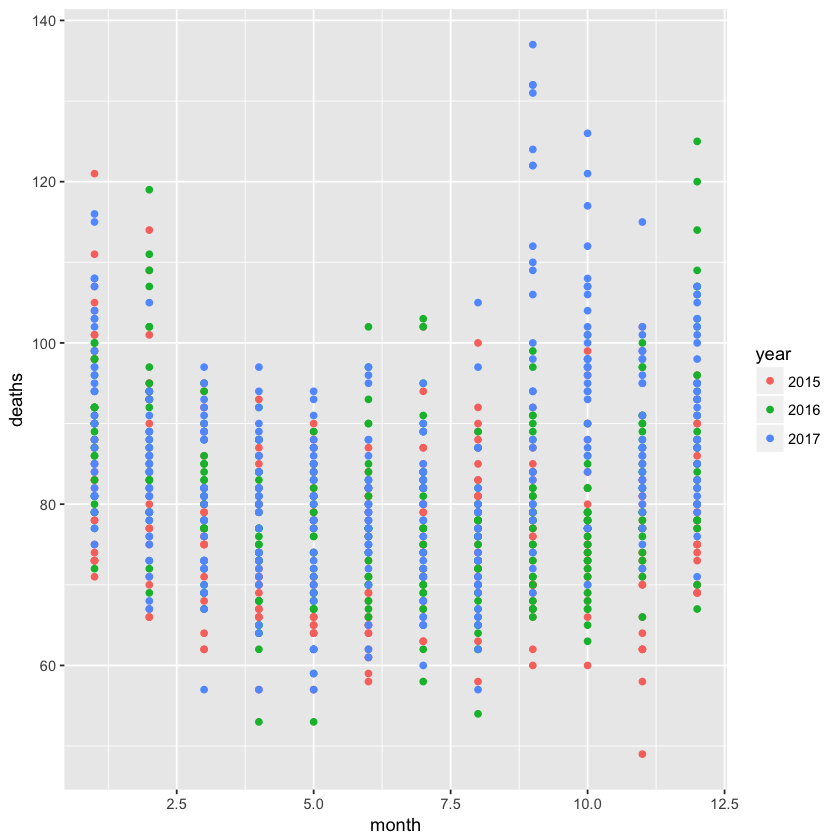

In [6]:
tab %>% filter(year!=2018) %>% ggplot(aes(month,deaths,col=year)) + geom_point()

The plot throws a warning message which indicates missing values in the column "deaths".
*"Warning message: Removed 2 rows containing missing values (geom_point)."*
The missing values can be identified with the following code

In [7]:
tab <- tab[-which(tab$deaths %in% NA),]

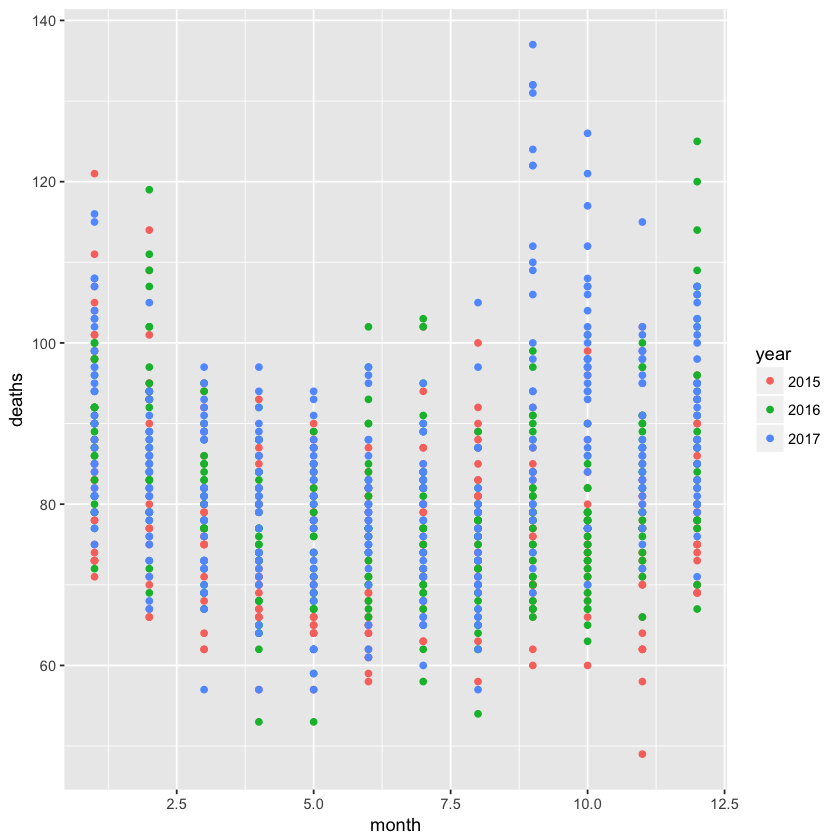

In [8]:
tab %>% filter(year!=2018) %>% ggplot(aes(month,deaths,col=year)) + geom_point()

>2. Create a new column `date` with the date for each observation. Hint: use the `make_date` function.

In [17]:
tab <- tab %>% mutate(date = make_date(year,month,day))

    
3. Plot deaths versus date.

    
4. Note that after May 31, 2018, the deaths are all 0. The data is probably not entered yet. We also see a drop off starting around May 1. Redefine `tab` to exclude observations taken on or after May 1, 2018. Then, remake the plot.

    

5. Remake the plot above but this time plot deaths against the day of the year, e.g. Jan 12, 2016 and Jan 12, 2017 are both day 12. Use color to denote the different years. Hint: use the __lubridate__ function `yday`.

    
6. Remake the plot above but, this time, use two different colors for before and after September 20, 2017.

    
7. Advanced: remake the plot above, but this time show the month in the x-axis. Hint: create a variable with the date for a given year. Then use the `scale_x_date` function to show just the months.

8. Remake the deaths versus day but with weekly averages. Hint: use the function `round_date`.

    
9. Remake the plot but with monthly averages. Hint: use the function `round_date` again.